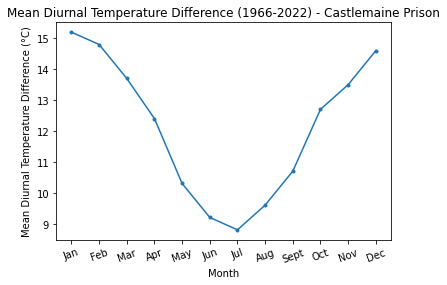

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import xarray
import seaborn as sns

max_temp = np.array([28.4,28.3,24.7,20.1,15.7,12.7,11.8,13.2,15.8,19.4,22.8,25.6])
min_temp = np.array([13.2,13.5,11.0,7.7,5.4,3.5,3.0,3.6,5.1,6.7,9.3,11.0])
plt.plot(max_temp-min_temp,  marker = '.')
plt.title('Mean Diurnal Temperature Difference (1966-2022) - Castlemaine Prison')
plt.xlabel('Month')
plt.ylabel('Mean Diurnal Temperature Difference (\N{DEGREE SIGN}C)')
months = np.arange(0,12)
month_string = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.xticks(ticks = months, labels = month_string, rotation = 20)
plt.show()

In [2]:
data_max = pd.read_excel('Downloads/castlemaine_max.xlsx')
data_min = pd.read_excel('Downloads/castlemaine_min.xlsx')

In [3]:
minimum = data_min.iloc[:-1,5]
maximum = data_max.iloc[:,5]

temp_difference = pd.DataFrame(np.array(maximum-minimum), index = pd.date_range("1966-1-1","2022-4-15"), columns = {'temp_difference'})

gridpoints (13,30)

In [4]:
temp_difference = temp_difference.loc[datetime(2015,1,1):datetime(2018,12,31)]

gridpoints = 2
jetnight = xarray.open_dataset('/g/data/v46/lh2344/jetnightsv2')
jetnight2 = xarray.DataArray(jetnight.jetnight2_v2, dims = ['time','latitude','longitude'])
jetnight2 = jetnight2.isel(latitude = slice(13-gridpoints,13+gridpoints), longitude = slice(30-gridpoints,30+gridpoints))
t = np.arange(datetime(2015,1,1), datetime(2019,1,1), timedelta(days=1)).astype(datetime)
jetnight2['time'] = t
jetnight_true = jetnight2.sum(dim = ['latitude', 'longitude']) > 0
jetnight_true = jetnight_true.to_numpy()

In [5]:
temp_difference_jn = temp_difference[jetnight_true]
temp_difference_nonjn = temp_difference[~jetnight_true]

print('mean temp difference on jet night (n='+ str(jetnight_true.sum()) +'):', temp_difference_jn.mean())
print('mean temp difference on non jet night (n='+ str(len(jetnight_true)-jetnight_true.sum()) +'):', temp_difference_nonjn.mean())
print('mean temp difference on all nights (n='+ str(len(jetnight_true)) +'):', temp_difference.mean())


mean temp difference on jet night (n=281): temp_difference    14.941603
dtype: float64
mean temp difference on non jet night (n=1180): temp_difference    10.974675
dtype: float64
mean temp difference on all nights (n=1461): temp_difference    11.750299
dtype: float64


In [9]:
grp_jn = temp_difference_jn.groupby(by = [temp_difference_jn.index.month]).mean().temp_difference
grp_nonjn = temp_difference_nonjn.groupby(by = [temp_difference_nonjn.index.month]).mean().temp_difference

In [7]:
grp_jn.loc[7] = np.nan
grp_jn

1     16.612821
2     15.824390
3     14.369444
4     13.083333
5      9.942857
6     11.450000
8     13.300000
9     10.775000
10    14.212500
11    14.779310
12    16.224528
7           NaN
Name: temp_difference, dtype: float64

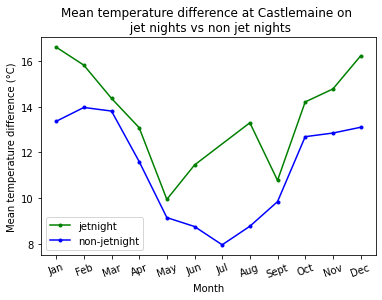

In [11]:
plt.plot(grp_jn.index,grp_jn, 
         color = 'green', label = 'jetnight', linestyle = 'solid', marker = '.')
plt.plot(grp_nonjn.index,grp_nonjn, 
         color = 'blue', label = 'non-jetnight', linestyle = 'solid', marker = '.')
months = np.arange(1,13)
month_string = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.xticks(ticks = months, labels = month_string, rotation = 20)
plt.xlabel('Month')
plt.ylabel('Mean temperature difference (\N{DEGREE SIGN}C)')
plt.title('Mean temperature difference at Castlemaine on \n jet nights vs non jet nights')
plt.legend()

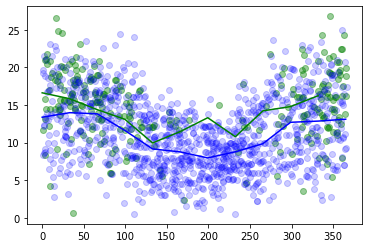

In [121]:
#scatter plot of above

plt.scatter(temp_difference_jn.index.dayofyear,temp_difference_jn.temp_difference, 
            label = 'jetnight', color = 'green', alpha = 0.4)
plt.scatter(temp_difference_nonjn.index.dayofyear,temp_difference_nonjn.temp_difference, 
            label = 'non-jetnight', color = 'blue', alpha = 0.2)
plt.plot(np.linspace(0,365,12),grp_jn, color = 'green', scalex = False)
plt.plot(np.linspace(0,365,12),grp_nonjn, color = 'blue')